In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,BatchNormalization,Dropout,Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


In [0]:
df=pd.read_csv("/content/drive/My Drive/data/ymgk/veri_seti.csv", encoding = 'utf8')

In [0]:
le = LabelEncoder()
df["Gece/Gunduz"]=le.fit_transform(df["Gece/Gunduz"])
df["Haftasonu/Haftaici"]=le.fit_transform(df["Haftasonu/Haftaici"])
df["Mevsim"]=le.fit_transform(df["Mevsim"])
labels=LabelEncoder().fit_transform(df["IstasyonTipi"])
y = labels
x = df.drop(["IstasyonTipi"], axis=1)
classes=list(le.fit(df["IstasyonTipi"]).classes_)
nb_classes= len(classes)
nb_features = x.shape[1]

In [0]:
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)
x_train  = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1],1)
x_valid  = np.array(x_valid).reshape(x_valid.shape[0], x_valid.shape[1],1)
x_test  = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1],1)

In [17]:
model = Sequential()
model.add(LSTM(512,input_shape = (nb_features,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.15))
model.add(Dense(2048, activation = "relu"))
model.add(Dense(1024, activation = "relu"))
model.add(Dense(nb_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 512)               1052672   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)             

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
score = model.fit(x_train, y_train, epochs = 50, validation_data=(x_valid,y_valid))


Epoch 1/50
404/404 [==============================] - 3s 7ms/step - loss: 1.0552 - acc: 0.4421 - val_loss: 1.0620 - val_acc: 0.4582
Epoch 2/50
404/404 [==============================] - 3s 6ms/step - loss: 1.0190 - acc: 0.4688 - val_loss: 0.9766 - val_acc: 0.5091
Epoch 3/50
404/404 [==============================] - 2s 6ms/step - loss: 0.9954 - acc: 0.4961 - val_loss: 0.9898 - val_acc: 0.4826
Epoch 4/50
404/404 [==============================] - 3s 6ms/step - loss: 0.9782 - acc: 0.5063 - val_loss: 0.9664 - val_acc: 0.5091
Epoch 5/50
404/404 [==============================] - 3s 6ms/step - loss: 0.9547 - acc: 0.5310 - val_loss: 0.9284 - val_acc: 0.5309
Epoch 6/50
404/404 [==============================] - 3s 6ms/step - loss: 0.9141 - acc: 0.5528 - val_loss: 0.8992 - val_acc: 0.5673
Epoch 7/50
404/404 [==============================] - 3s 6ms/step - loss: 0.8752 - acc: 0.5802 - val_loss: 0.8324 - val_acc: 0.6043
Epoch 8/50
404/404 [==============================] - 3s 6ms/step - loss: 0.

In [20]:
results = model.evaluate(x_test, y_test, batch_size=128)

34/34 [==============================] - 0s 6ms/step - loss: 0.4705 - acc: 0.8767


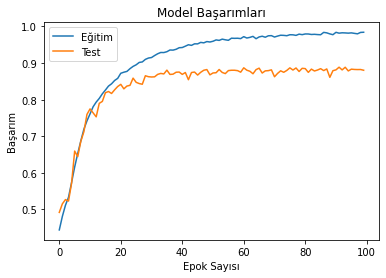

In [11]:
plt.plot(model.history.history["acc"])
plt.plot(model.history.history["val_acc"])
plt.title("Model Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epok Sayısı")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()


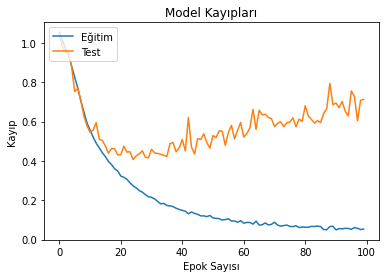

In [12]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Kayıpları")
plt.ylabel("Kayıp")
plt.xlabel("Epok Sayısı")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()

In [21]:
model.save('path/to/location')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets
